# Tutorial: Supervised Learning Problem and Least Squares

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.in2p3.fr%2Fenergy4climate%2Fpublic%2Feducation%2Fmachine_learning_for_climate_and_energy/master?filepath=book%2Fnotebooks%2F02_tutorial_supervised_learning_problem_ols.ipynb)

Tutorial to the classes [Supervised Learning Problem and Least Squares](02_supervised_learning_problem.ipynb) and [Ordinary Least Squares](03_ordinary_least_squares.ipynb).

<div class="alert alert-block alert-info">
    <b>Tutorial Objectives</b>
    
- Read, plot and analyze train data
- Use supervised learning to predict the regional electricity consumption of France in response electric heating based on temperature data
- Test the linear least squares (OLS) model
- Evaluate their performance by estimating their Expected Prediction Errors (EPE) using test data
</div>

## Dataset presentation

- Input:
  - 2m-temperature
    - Domain: Metropolitan France
    - Spatial resolution: regional average
    - Time resolution: hourly
    - Period: 2014-2021
    - Units: °C
    - Source: [MERRA-2 reanalysis](https://gmao.gsfc.nasa.gov/reanalysis/MERRA-2/)
- Target:
  - Electricity demand
    - Domain: Metropolitan France
    - Spatial resolution: regional sum
    - Time resolution: hourly
    - Period: 2014-2021
    - Units: MWh
    - Source: [RTE](https://opendata.reseaux-energies.fr/)

## Reading and pre-analysis of the input and output data

### Import data-analysis and plot modules and define paths

In [5]:
# Path manipulation module
from pathlib import Path
# Numerical analysis module
import numpy as np
# Formatted numerical analysis module
import pandas as pd
# Plot module
import matplotlib.pyplot as plt
# Default colors
RC_COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']
# Matplotlib configuration
plt.rc('font', size=14)

In [6]:
# Set data directory
data_dir = Path('data')

# Set keyword arguments for pd.read_csv
kwargs_read_csv = dict()

# Set first and last years
FIRST_YEAR = 2014
LAST_YEAR = 2021

# Define temperature filepath
temp_filename = 'surface_temperature_merra2_{}-{}.csv'.format(
    FIRST_YEAR, LAST_YEAR)
temp_filepath = Path(data_dir, temp_filename)
temp_label = 'Temperature (°C)'

# Define electricity demand filepath
dem_filename = 'reseaux_energies_demand_demand.csv'
dem_filepath = Path(data_dir, dem_filename)
dem_label = 'Electricity consumption (MWh)'

### Reading and plotting the raw temperature data

> ***Question (code cells below)***
> - Use `pd.read_csv` with the filepath and appropriate options to make sure to get the column names and the index as dates (`DatetimeIndex`).
> - Use the `resample` method from the data frame to compute daily means.
> - Plot the `'Île-de-France'` daily-mean temperature time series for (a) the whole period, (b) one year, (c) one month in winter and (d) one month in summer on 4 different figures (use `plt.figure`) using `plt.plot` or the `plot` method from data frames (preferably).
> - Use the `mean` and `var` methods to get mean and variance of the daily-mean temperature.

In [7]:
# answer cell
df_temp = pd.read_csv(temp_filepath, parse_dates=True, index_col=0, header=0)
df_temp_IF_day=df_temp['Île-de-France'].resample('D').mean()
df_temp_IF_day_var=df_temp['Île-de-France'].resample('D').var() 
df_temp.head()


,Grand Est,Nouvelle-Aquitaine,Auvergne-Rhône-Alpes,Bourgogne-Franche-Comté,Bretagne,Centre-Val de Loire,Île-de-France,Occitanie,Hauts-de-France,Normandie,Pays de la Loire,Provence-Alpes-Côte d'Azur
time,,,,,,,,,,,,
2014-01-01 00:00:00+00:00,2.831726,7.069458,2.800629,3.720520,8.367065,5.591950,5.584137,6.643921,4.568512,3.880218,7.083618,3.379333
2014-01-01 01:00:00+00:00,2.981445,6.853302,2.692261,3.743195,8.393005,5.230896,5.503662,6.519012,4.261169,3.794159,7.153290,3.383453
2014-01-01 02:00:00+00:00,3.114227,6.616943,2.624237,3.735352,8.307800,4.896515,5.422058,6.415436,4.033905,3.808685,7.303253,3.354370
2014-01-01 03:00:00+00:00,3.375610,6.341644,2.648132,3.794952,8.361298,4.676727,5.059296,6.243591,3.912689,3.805939,7.490418,3.326660
2014-01-01 04:00:00+00:00,3.649963,6.107422,2.684998,3.780426,8.510193,4.642578,4.453552,6.014252,3.946747,3.948578,7.695252,3.321167


<Axes: title={'center': 'Daily average temperature in Île-de-France (2014-2021)'}, xlabel='time', ylabel='Temperature (°C)'>

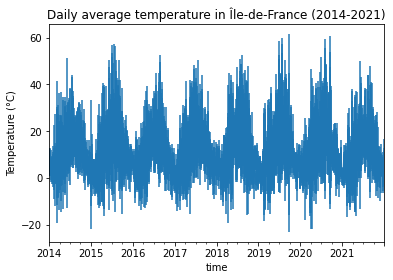

In [8]:
df_temp_IF_day.plot(yerr=df_temp_IF_day_var, title='Daily average temperature in Île-de-France (2014-2021)', ylabel=temp_label)

<Axes: title={'center': 'Daily average temperature in Île-de-France (2014-2021)'}, xlabel='time', ylabel='Temperature (°C)'>

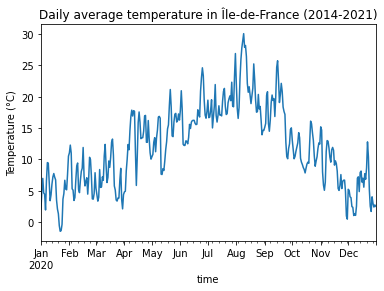

In [9]:
df_temp_IF_day['2020'].plot( title='Daily average temperature in Île-de-France (2014-2021)', ylabel=temp_label)

<Axes: title={'center': 'Daily average temperature in Île-de-France (2014-2021)'}, xlabel='time', ylabel='Temperature (°C)'>

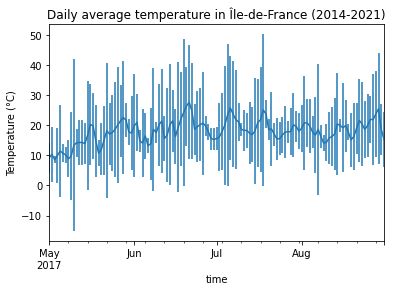

In [10]:
df_temp_IF_day['2017-05-01':'2017-08-31'].plot(yerr=df_temp_IF_day_var, title='Daily average temperature in Île-de-France (2014-2021)', ylabel=temp_label)

<Axes: title={'center': 'Daily average temperature in Île-de-France (2014-2021)'}, xlabel='time', ylabel='Temperature (°C)'>

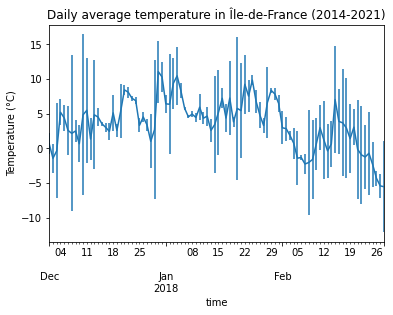

In [11]:
df_temp_IF_day['2017-12-01':'2018-02-28'].plot(yerr=df_temp_IF_day_var, title='Daily average temperature in Île-de-France (2014-2021)', ylabel=temp_label)

### Reading and plotting the demand data

> ***Question***
> - Same question for the demand but with daily sums instead of daily means

In [12]:
df_dem = pd.read_csv(dem_filepath, parse_dates=True, index_col=0, header=0)
df_dem_IF_day=df_dem['Île-de-France'].resample('D').sum()
df_dem.head()



,Auvergne-Rhône-Alpes,Bourgogne-Franche-Comté,Bretagne,Centre-Val de Loire,Grand Est,Hauts-de-France,Île-de-France,Normandie,Nouvelle-Aquitaine,Occitanie,Pays de la Loire,Provence-Alpes-Côte d'Azur
time,,,,,,,,,,,,
2014-01-01 00:00:00+00:00,16504,4877,6085,5006,10282,12423,18051,7217,11777,10845,7368,12147
2014-01-01 01:00:00+00:00,16471,5068,6228,4900,10401,12035,17179,7130,11703,10569,7294,12019
2014-01-01 02:00:00+00:00,15968,4887,5591,4709,9899,11364,16365,6661,10954,9899,6556,11452
2014-01-01 03:00:00+00:00,15162,4580,5157,4306,9375,10839,15703,6233,10121,9451,6155,10818
2014-01-01 04:00:00+00:00,14851,4399,5001,4299,9025,10636,15549,6113,9674,8960,6048,10538


<Axes: title={'center': 'Daily electricity demand in Île-de-France (2014-2021)'}, xlabel='time', ylabel='Electricity consumption (MWh)'>

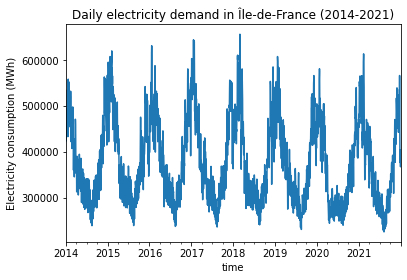

In [13]:
df_dem_IF_day.plot( title='Daily electricity demand in Île-de-France (2014-2021)', ylabel=dem_label)

<Axes: title={'center': 'Daily electricity demand Île-de-France (2014-2021)'}, xlabel='time', ylabel='Electricity consumption (MWh)'>

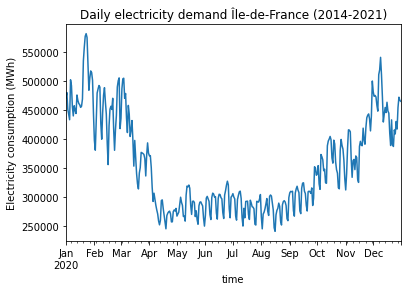

In [14]:
df_dem_IF_day['2020'].plot( title='Daily electricity demand Île-de-France (2014-2021)', ylabel=dem_label)

<Axes: title={'center': 'Daily electricity demand in Île-de-France (2014-2021)'}, xlabel='time', ylabel='Electricity consumption (MWh)'>

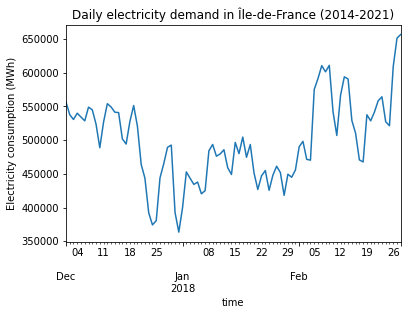

In [15]:
df_dem_IF_day['2017-12-01':'2018-02-28'].plot( title='Daily electricity demand in Île-de-France (2014-2021)', ylabel=dem_label)

<Axes: title={'center': 'Daily electricity demand in Île-de-France (2014-2021)'}, xlabel='time', ylabel='Electricity consumption (MWh)'>

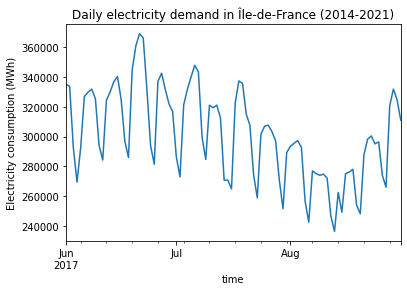

In [16]:
df_dem_IF_day['2017-06-01':'2017-08-31'].plot( title='Daily electricity demand in Île-de-France (2014-2021)', ylabel=dem_label)

### Analyzing the input and target data and their relationships

> ***Question (write your answer in text box below)***
> - Describe the seasonality of the temperature in Île-de-France.
> - Are all years the same?
> - Describe the seasonal and weakly demand patterns.

Answer:

> ***Question***
> - Select the temperature and demand data for their largest common period using the `intersection` method of the `index` attribute of the data frames.
> - Represent a scatter plot of the daily demand versus the daily temperature using `plt.scatter`.

2922 2922


Text(0, 0.5, 'Electricity consumption (MWh)')

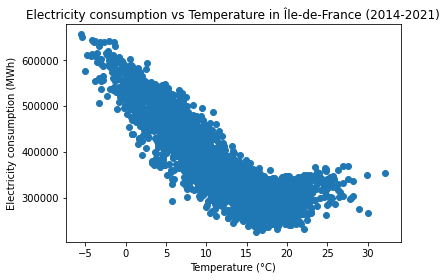

In [17]:
# answer cell
index=df_temp_IF_day.index.intersection(df_dem_IF_day.index)
df_temp_IF_day_I=df_temp_IF_day.loc[index]
df_dem_IF_day_I=df_dem_IF_day.loc[index]  
print (df_temp_IF_day_I.size, df_dem_IF_day_I.size)
plt.scatter(df_temp_IF_day_I,df_dem_IF_day_I)
plt.title('Electricity consumption vs Temperature in Île-de-France (2014-2021)')
plt.xlabel(temp_label)
plt.ylabel(dem_label)
# answer cell

> ***Question***
> - Compute the correlation between the daily temperature and the daily demand in Île-de-France using `np.corrcoef`.
> - Compute the correlation between the monthly temperature and the monthly demand using the `resample` method.
> - What do you think explains the difference between the daily and the monthly correlation?

In [18]:
# answer cell

correlation=np.corrcoef(df_temp_IF_day_I,df_dem_IF_day_I)[0,1]
print('Correlation coefficient between temperature and electricity demand:', correlation)

Correlation coefficient between temperature and electricity demand: -0.8601297017490052


Answer:

## Ordinary Least Squares

> ***Question***
> - Perform an OLS with intercept using the entire dataset from the temperature using the formula for the optimal coefficients derived in [Supervised Learning Problem and Least Squares](2_supervised_learning_problem_ols.ipynb) (without Scikit-Learn). To do so:
>   - Prepare the input matrix and output vector with the `np.concatenate` function (for instance);
>   - Use the matrix-multiplication operator seen in [Introduction](1_introduction.ipynb) and the `np.linalg.inv` function to compute the optimal coefficients and print them.
> - Use the estimated coefficents to predict the target from the input train data.
> - Overlay your prediction to the scatter plot of the train data.
> - Compute the train Mean Squared Error (MSE) and the train coefficient of determination ($R^2$) and print them.

In [19]:
# answer cell
y=df_dem_IF_day_I.values[:,None]
x=df_temp_IF_day_I.values[:,None]
X=np.concatenate((np.ones(x.shape), x), axis=1)
beta=np.linalg.inv(X.T @ X) @ X.T @ y
print('Estimated coefficients (intercept and slope):', beta)

R_2=(y-X@beta).T@(y-X@beta)/((y - y.mean())**2).sum()
print('R² score of the OLS regression:', 1 - R_2[0])


Estimated coefficients (intercept and slope): [[515062.29649111]
 [-11638.0217295 ]]
R² score of the OLS regression: [0.7398231]


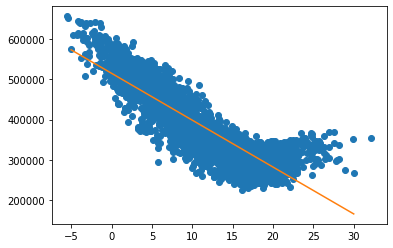

In [20]:
x_test=np.linspace(-5,30,100)
y_sol=x_test*beta[1]+beta[0]
plt.scatter(df_temp_IF_day_I,df_dem_IF_day_I, label='Data points')
plt.plot(x_test, y_sol, color=RC_COLORS[1], label='OLS regression')

> ***Question***
> - Compute the optimal coefficients using centered input temperatures.
> - Compute the optimal intercept alone using a single-column input matrix.
> - Compare the resulting two estimations of the intercept with the sample mean of the target train data.

In [21]:
# answer cell

X_cent=np.concatenate((np.ones(x.shape), x-x.mean()), axis=1)
y_cent=y-y.mean()
beta_cent=np.linalg.inv(X_cent.T @ X_cent) @ X_cent.T @ y
print('Estimated coefficients (intercept and slope):', beta_cent)

print(y.mean())


Estimated coefficients (intercept and slope): [[383296.13449692]
 [-11638.0217295 ]]
383296.1344969199


> ***Question***
> - Perform an OLS fit with intercept using the entire dataset to predict the demand from the temperature using Scikit-learn. To do so:
>   - Import the `linear_model` module from `sklearn` (Scikit-Learn)
>   - Define a regressor using `linear_model.LinearRegression` (by default, the regressor is configured to fit an intercept in addition to the features, see `fit_intercept` option)
>   - Prepare the input matrix and output vector for the `fit` method of the regressor
>   - Apply the `fit` method to the input and output
> - Print the fitted coefficients using the `coef_` attribute of the regressor.
> - Compute the train $R^2$ coefficient using the `score` method of the regressor.
> - Compare the resulting coefficients and score to those obtained above by applying the formulas yourself.

In [24]:
# answer cell
from sklearn import linear_model as lin
reg=lin.LinearRegression()
reg.fit(x,y)
print('Estimated coefficients (intercept and slope) using scikit-learn:', reg.intercept_, reg.coef_[0,0],reg.score(x,y))



Estimated coefficients (intercept and slope) using scikit-learn: [515062.29649111] -11638.021729499447 0.7398231038308329


Answer: 

> ***Question***
> - Define and array of 100 temperatures ranging from -5 to 35°C with `np.linspace`.
> - Make a prediction of the demand for these temperatures using the trained OLS model with the `predict` method of the regressor.
> - Plot this prediction over the scatter plot of the train data.
> - Does the demand prediction seem satisfactory over the whole range of temperatures?

In [23]:
# answer cell


Answer:

***
## Credit

[//]: # "This notebook is part of [E4C Interdisciplinary Center - Education](https://gitlab.in2p3.fr/energy4climate/public/education)."
Contributors include Bruno Deremble and Alexis Tantet.
Several slides and images are taken from the very good [Scikit-learn course](https://inria.github.io/scikit-learn-mooc/).

<br>

<div style="display: flex; height: 70px">
    
<img alt="Logo LMD" src="images/logos/logo_lmd.jpg" style="display: inline-block"/>

<img alt="Logo IPSL" src="images/logos/logo_ipsl.png" style="display: inline-block"/>

<img alt="Logo E4C" src="images/logos/logo_e4c_final.png" style="display: inline-block"/>

<img alt="Logo EP" src="images/logos/logo_ep.png" style="display: inline-block"/>

<img alt="Logo SU" src="images/logos/logo_su.png" style="display: inline-block"/>

<img alt="Logo ENS" src="images/logos/logo_ens.jpg" style="display: inline-block"/>

<img alt="Logo CNRS" src="images/logos/logo_cnrs.png" style="display: inline-block"/>
    
</div>

<hr>

<div style="display: flex">
    <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0; margin-right: 10px" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a>
    <br>This work is licensed under a &nbsp; <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.
</div>